0.0894427191
0.0145538498205


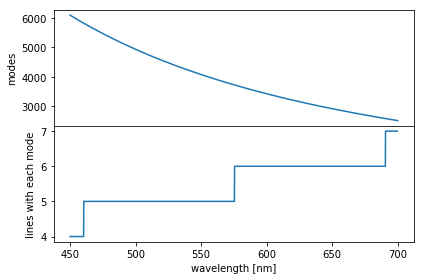

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import speed_of_light, pi

c_s = 2
area = 33 * 132 * (10**-6)**2
NA = 1/(2*3.0)

def invert(wavelength):
    return speed_of_light / wavelength

def w_modes(wavelength):
    return ((16/pi) * c_s * area * (NA / wavelength)**2)

def f_modes(freq):
    return ((16/pi) * c_s * area * (NA * freq / speed_of_light)**2)

def d_f_modes(freq):
    return ((16/pi) * c_s * area * 2 * freq * (NA/speed_of_light)**2)

min_wavelength = 450 * 10**-9
max_wavelength = 700 * 10**-9
wavelength = np.arange(min_wavelength, max_wavelength, 10**-12)

freq = np.arange(invert(max_wavelength), invert(min_wavelength), 14*10**9)

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(invert(freq)*(10**9), f_modes(freq))
ax1.set_ylabel('modes')

# ax2.plot(invert(freq)*(10**9), 1+1/np.gradient(f_modes(freq)), label='1+1/gradient')

all_modes = f_modes(freq)
test = all_modes[0]
count = 0
freqs = []
counts = []
for i in range(len(freq)):
    if abs(all_modes[i]-test) < 1:
        count += 1
    else:
        freqs.append(freq[i-1])
        counts.append(count)
        test = all_modes[i]
        count = 1
freqs = np.asarray(freqs[1:])
counts = counts[1:]
        
ax2.plot(invert(freqs)*(10**9), counts, label='actual')
ax2.set_xlabel('wavelength [nm]')
ax2.set_ylabel('lines with each mode')

fig.tight_layout()
fig.subplots_adjust(hspace=0)

len(freq) / (max(counts) * 5)
print(0.6 / np.sqrt(45))
print(0.6 / np.sqrt(len(freq)/10))

fig.savefig('modal_noise_smoothness_2.png')
        

In [166]:
hasattr({}, '__dict__')

False